In [11]:
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于数据可视化
from sklearn import datasets  # 提供内置数据集
from sklearn.model_selection import train_test_split  # 用于划分训练集和测试集
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text  # 决策树相关功能
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 模型评估指标
import seaborn as sns  # 基于matplotlib的高级可视化库
from matplotlib import rcParams
rcParams['font.family'] = 'STHeiti'

In [4]:
# 1. 加载鸢尾花数据集
iris = datasets.load_iris()  # 加载内置的鸢尾花数据集
X = iris.data  # 特征数据矩阵（150个样本，4个特征）
y = iris.target  # 目标标签向量（0, 1, 2 对应三种鸢尾花）
feature_names = iris.feature_names  # 特征名称列表
class_names = iris.target_names  # 类别名称列表

In [5]:
# 2. 划分训练集和测试集
# 使用train_test_split函数将数据集分为训练集(80%)和测试集(20%)
# random_state=42确保每次运行结果一致
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 测试集比例20%
    random_state=42  # 随机种子，保证结果可复现
)

In [6]:
# 3. 创建并训练决策树模型 - 使用信息熵作为划分标准
# 创建决策树分类器实例
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',  # 使用信息熵（信息增益）作为分类标准
    max_depth=3,  # 限制树的最大深度为3，防止过拟合
    random_state=42  # 随机种子，保证结果可复现
)
dt_classifier.fit(X_train, y_train)  # 在训练数据上训练模型

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
# 4. 模型评估
# 在训练集和测试集上进行预测
y_train_pred = dt_classifier.predict(X_train)  # 训练集预测结果
y_test_pred = dt_classifier.predict(X_test)  # 测试集预测结果

In [9]:
# 计算准确率
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

训练集准确率: {train_accuracy:.4f}
测试集准确率: 1.0000

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



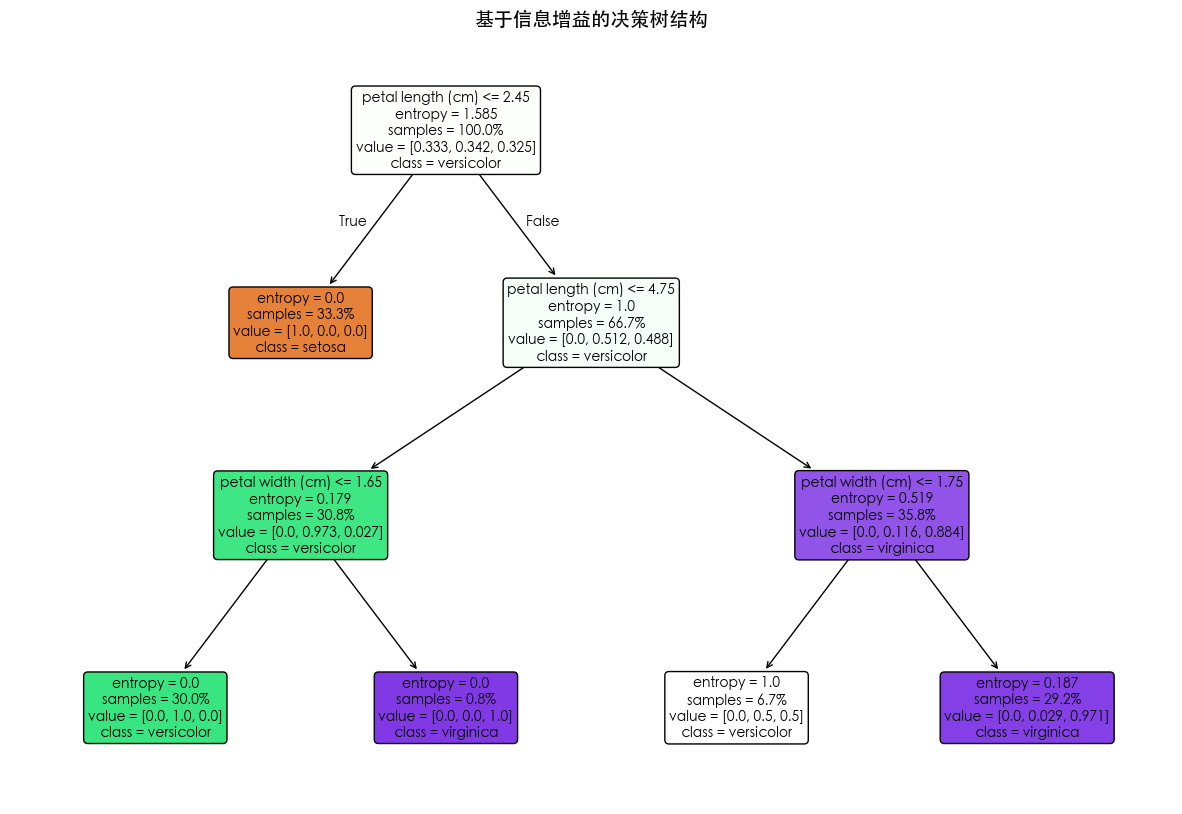

In [12]:
# 计算准确率（假设已经计算了 train_accuracy 和 test_accuracy）
print("训练集准确率: {train_accuracy:.4f}")  # 格式化输出训练准确率
print(f"测试集准确率: {test_accuracy:.4f}")  # 格式化输出测试准确率

# 生成并打印分类报告（包含精确率、召回率、F1分数等指标）
print("\n分类报告:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

# 5. 可视化决策树结构
plt.figure(figsize=(15, 10))  # 创建大尺寸图像
plot_tree(
    dt_classifier,  # 要可视化的决策树模型
    filled=True,  # 填充颜色表示类别
    feature_names=feature_names,  # 使用特征名称
    class_names=class_names,  # 使用类别名称
    rounded=True,  # 圆角节点
    proportion=True,  # 显示样本比例而非数量
    fontsize=10  # 字体大小
)
plt.title("基于信息增益的决策树结构", fontsize=14)  # 添加标题
plt.show()  # 显示图像

In [14]:
cm = confusion_matrix(y_test, y_test_pred)  # 计算混淆矩阵

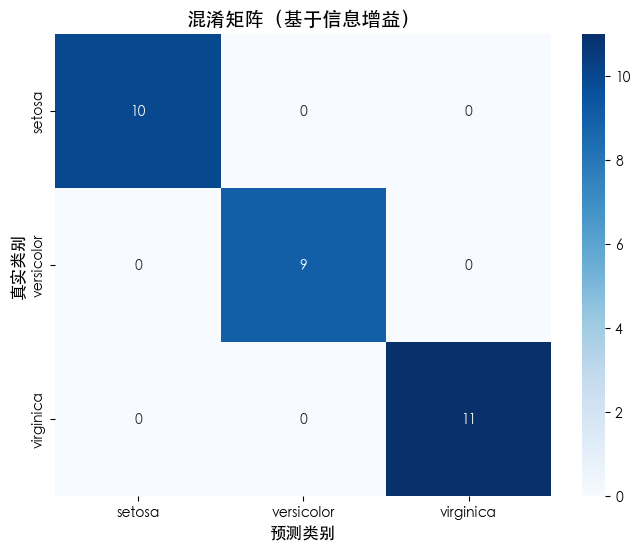

In [15]:
plt.figure(figsize=(8, 6)) # 设置图像尺寸
sns.heatmap(
    cm, # 混淆矩阵数据
    annot=True, # 在单元格中显示数值
    fmt="d", # 数值格式为整数
    cmap="Blues", # 蓝色调色板
    xticklabels=class_names, # x轴刻度标签为类别名称
    yticklabels=class_names # y轴刻度标签为类别名称
) # 添加缺失的右括号

plt.title("混淆矩阵（基于信息增益）", fontsize=14) # 标题
plt.ylabel("真实类别", fontsize=12) # y轴标签
plt.xlabel("预测类别", fontsize=12) # x轴标签
plt.show() # 显示图像